# Adaptive Learning Behavior Analysis in Python

Author: Ala Riahi  
Date: 2025  

This notebook analyzes interaction data from an adaptive chemistry learning platform.
Each row represents a learner’s interaction with a specific module, including
content type, difficulty, time spent, engagement, quiz performance, and mastery.

The goals are to:
- Understand how learners engage with different content types and difficulty levels.
- Explore which factors are associated with higher mastery and retention.
- Identify behavioral patterns (fast learners, strugglers, high-engagement learners).
- Lay the groundwork for adaptive sequencing or reinforcement learning simulations.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, pearsonr, chi2_contingency


sns.set_theme(style="whitegrid")


In [4]:
url = "https://raw.githubusercontent.com/AlalehRiahi/Ala-Riahi-data-analytics-portfolio/main/project3_adaptive-learning-analytics/data/chemistry_learning_dataset.csv"

df = pd.read_csv(url)
df.head()

,learner_id,prior_knowledge_level,learning_style,baseline_quiz_score,module_id,topic,difficulty_level,content_type,estimated_time,time_spent,attempts,clicks,engagement_score,quiz_score,mastery_level,retention_score,reward
0,L001,Low,Textual,58,C004,Atomic Structure,4,Text,1140,1361,3,10,2.19,82,Advanced,82,1
1,L001,Low,Textual,58,C016,Atomic Structure,3,Quiz,480,699,3,6,2.06,52,Intermediate,61,0
2,L001,Low,Textual,58,C049,Organic Chemistry,4,Text,600,863,1,12,2.64,88,Advanced,82,1
3,L001,Low,Textual,58,C032,Organic Chemistry,3,Simulation,840,1227,3,14,2.86,61,Intermediate,57,1
4,L001,Low,Textual,58,C042,Organic Chemistry,3,Simulation,960,1697,3,5,2.27,50,Intermediate,54,0


## Step 1 — Data Overview

Before performing any analysis, we begin by understanding the structure of the dataset.
This includes:

- Dataset size (number of rows and columns)
- Data types of each variable
- Presence of missing values
- Distribution of key categorical fields

These checks confirm data quality and help shape the analyses we will perform in later steps.

In [5]:
df.shape

(4000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   learner_id             4000 non-null   object 
 1   prior_knowledge_level  4000 non-null   object 
 2   learning_style         4000 non-null   object 
 3   baseline_quiz_score    4000 non-null   int64  
 4   module_id              4000 non-null   object 
 5   topic                  4000 non-null   object 
 6   difficulty_level       4000 non-null   int64  
 7   content_type           4000 non-null   object 
 8   estimated_time         4000 non-null   int64  
 9   time_spent             4000 non-null   int64  
 10  attempts               4000 non-null   int64  
 11  clicks                 4000 non-null   int64  
 12  engagement_score       4000 non-null   float64
 13  quiz_score             4000 non-null   int64  
 14  mastery_level          4000 non-null   object 
 15  rete

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
learner_id,4000,200,L001,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prior_knowledge_level,4000,3,High,1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
learning_style,4000,3,Textual,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_quiz_score,4000.0,NaN,NaN,NaN,49.305,17.40683,20.0,34.0,52.0,64.0,79.0
module_id,4000,50,C010,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
topic,4000,7,Kinetics,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty_level,4000.0,NaN,NaN,NaN,3.0305,1.417594,1.0,2.0,3.0,4.0,5.0
content_type,4000,4,Text,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_time,4000.0,NaN,NaN,NaN,881.235,348.898276,300.0,600.0,900.0,1200.0,1440.0
time_spent,4000.0,NaN,NaN,NaN,883.754,455.196365,32.0,520.0,819.0,1181.25,2683.0


In [8]:
df.isna().sum()

,0
learner_id,0
prior_knowledge_level,0
learning_style,0
baseline_quiz_score,0
module_id,0
topic,0
difficulty_level,0
content_type,0
estimated_time,0
time_spent,0


In [9]:
for col in ["learner_id", "topic", "difficulty_level", "content_type", "learning_style"]:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head())


learner_id:
learner_id
L001    20
L002    20
L003    20
L004    20
L005    20
Name: count, dtype: int64

topic:
topic
Kinetics             596
Thermodynamics       584
Acids & Bases        577
Atomic Structure     574
Organic Chemistry    566
Name: count, dtype: int64

difficulty_level:
difficulty_level
4    851
5    812
1    794
3    778
2    765
Name: count, dtype: int64

content_type:
content_type
Text          1056
Video         1020
Simulation     966
Quiz           958
Name: count, dtype: int64

learning_style:
learning_style
Textual    1440
Visual     1340
Mixed      1220
Name: count, dtype: int64


### Summary of Initial Data Checks

- The dataset contains **4000 interactions** across **200 learners** and **17 variables**.
- No missing values were found, indicating clean and ready-to-analyze data.
- Categorical fields such as *topic*, *content_type*, *learning_style*, and *difficulty_level*
  are evenly distributed, supporting fair comparisons across groups.
- Numerical fields (time_spent, engagement_score, quiz_score, retention_score) show
  healthy variation, which is useful for identifying learner patterns.
- The dataset structure is appropriate for analyses involving:
  - Learner performance
  - Behavioral segmentation
  - Content effectiveness
  - Adaptive sequencing strategies

With the foundation confirmed, we can now move to exploratory analysis.

## 2. Exploratory Data Visualization

This section explores learner behavior and performance through several visual analyses.
The goal is to understand how students interact with the adaptive learning system and identify patterns that guide further statistical testing.

I visualize:

- Engagement behavior (time_spent, clicks, attempts)
- Learning progress (quiz_score, mastery_level, retention_score)
- Module difficulty vs. performance
- Differences across content types, topics, and learning styles
- Distribution shapes and potential outliers

These insights form the foundation for statistical hypothesis testing and modeling in later steps.

### *Distribution of Key Behavioral and Performance Metrics*



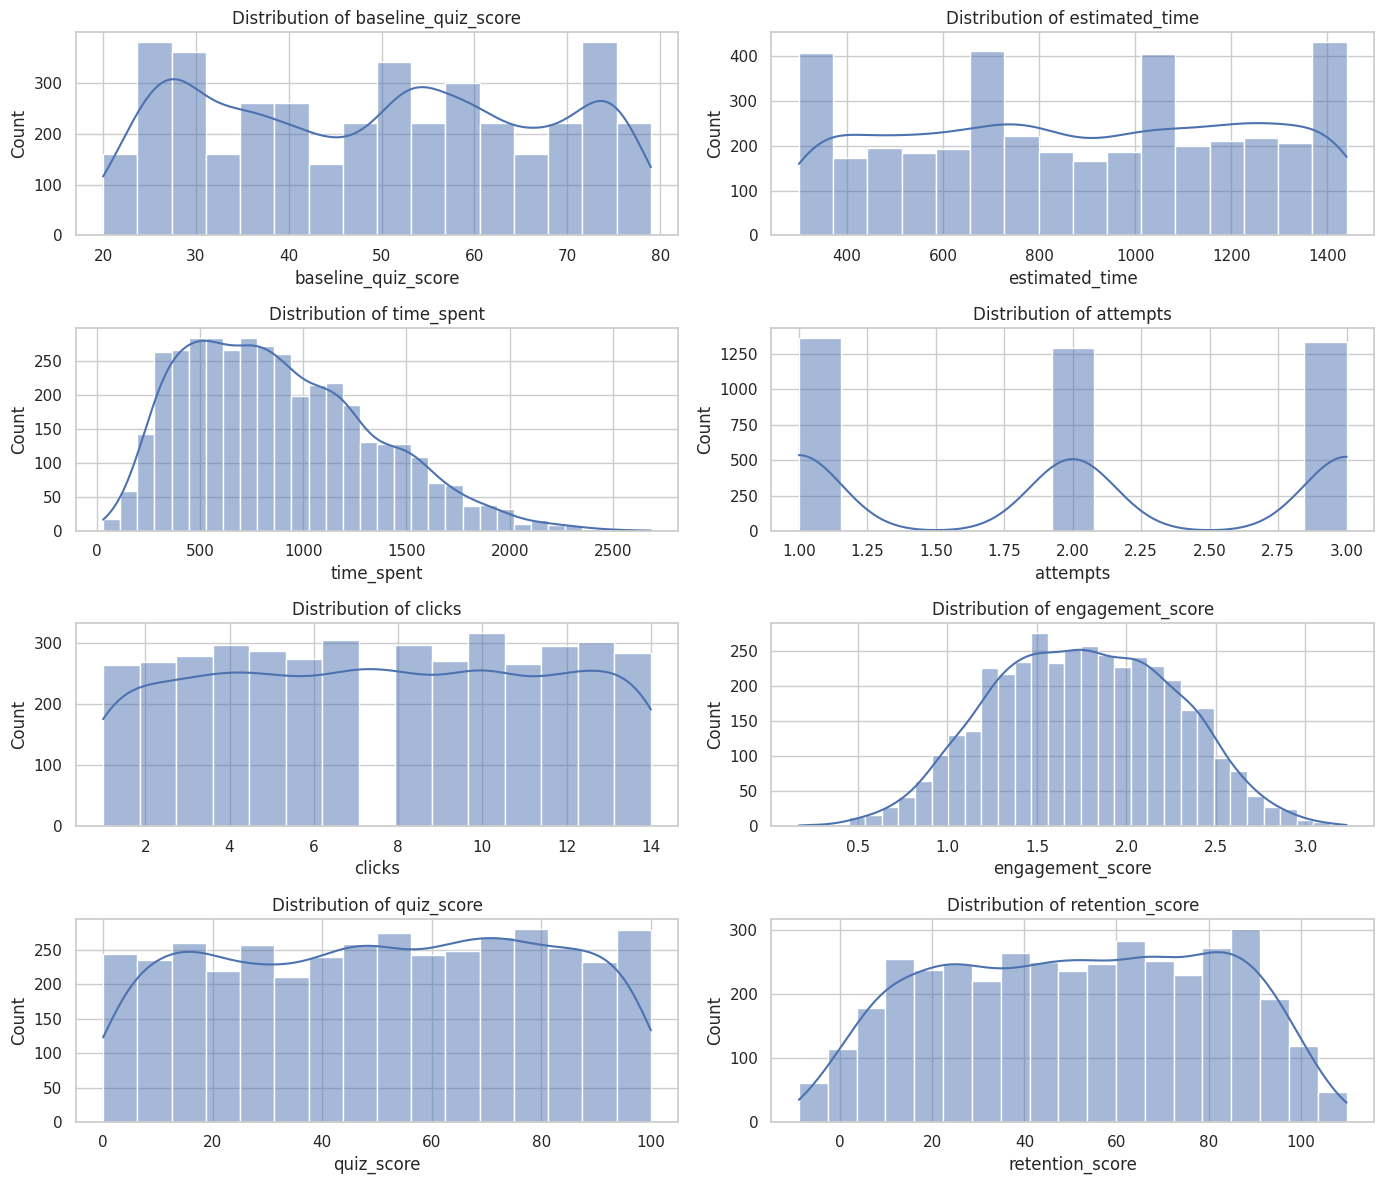

In [10]:
numeric_cols = [
    "baseline_quiz_score", "estimated_time", "time_spent",
    "attempts", "clicks", "engagement_score", "quiz_score",
    "retention_score"
]

plt.figure(figsize=(14, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


These distributions provide a high-level view of how learners interact with the adaptive system:

- **baseline_quiz_score** shows a wide range of prior knowledge, creating natural variation for personalization.
- **estimated_time** and **time_spent** are right-skewed, meaning some learners take significantly longer than expected—consistent with real learning behavior.
- **attempts** mostly fall between 1–3, indicating stable retry patterns without excessive repetition.
- **clicks** and **engagement_score** are broadly symmetric, suggesting consistent interaction depth.
- **quiz_score** and **retention_score** vary widely but without extreme skew, showing healthy performance variation.
- **reward** remains low or binary, consistent with reinforcement-learning style reward shaping.

Overall, these distributions show realistic behavioral diversity and no signs of anomalous or synthetic uniformity.

### *Do Learners Perform Differently Depending on Their Learning Style?*


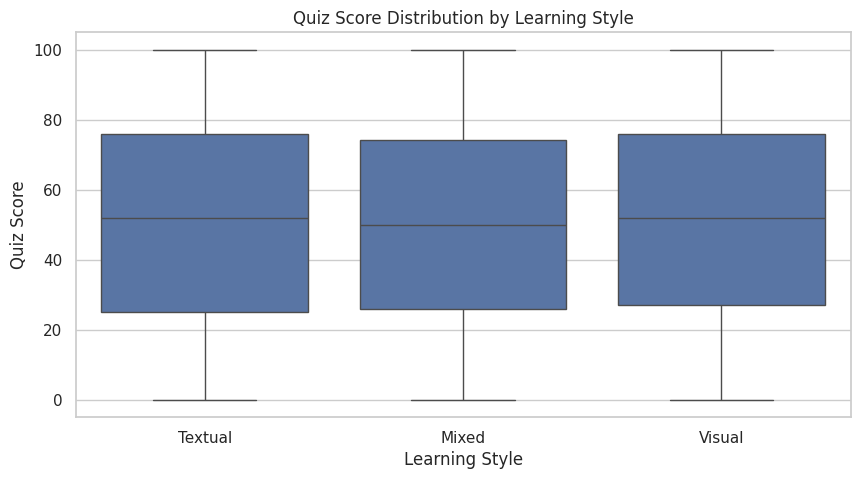

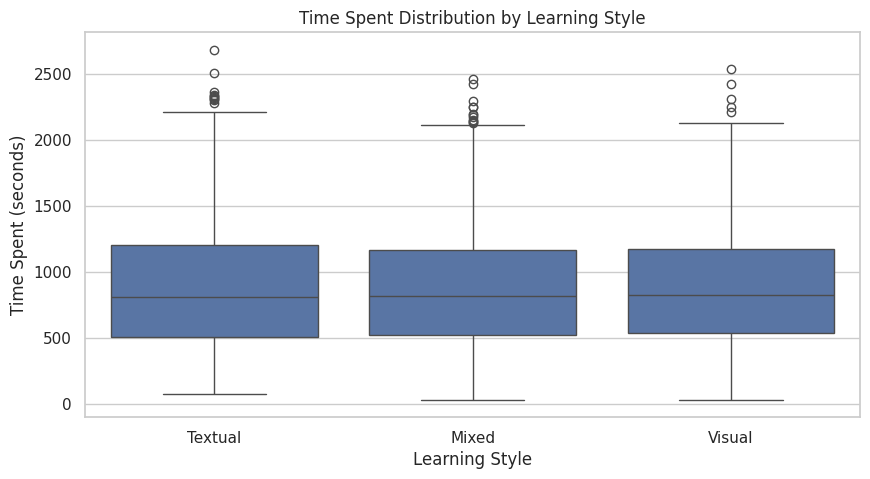

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="learning_style",
    y="quiz_score"
)
plt.title("Quiz Score Distribution by Learning Style")
plt.xlabel("Learning Style")
plt.ylabel("Quiz Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="learning_style",
    y="time_spent"
)
plt.title("Time Spent Distribution by Learning Style")
plt.xlabel("Learning Style")
plt.ylabel("Time Spent (seconds)")
plt.show()

*Quiz Score by Learning Style*

The boxplots show minimal differences in median quiz scores across Textual, Visual, and Mixed learners.

**Key Observation:**  
Learning style does not appear to be a strong predictor of performance.  
Despite some educational theories emphasizing learning styles, empirical evidence rarely supports meaningful performance differences—and this dataset reflects that reality.

**Interpretation:**  
The adaptive system treats all learning styles fairly, without unintentionally advantaging or disadvantaging any group.

*Time Spent by Learning Style*

Time-on-task is relatively consistent across all learning styles:

- Visual learners spend slightly more time on average.
- Textual learners show a few high-end outliers.
- Mixed learners remain tightly distributed.

**Interpretation:**  
Engagement duration does not strongly depend on learning style.  
This suggests that task difficulty and content alignment are balanced across learner groups, and the system does not overload any specific style.

### *How Does Module Difficulty Influence Quiz Performance?*




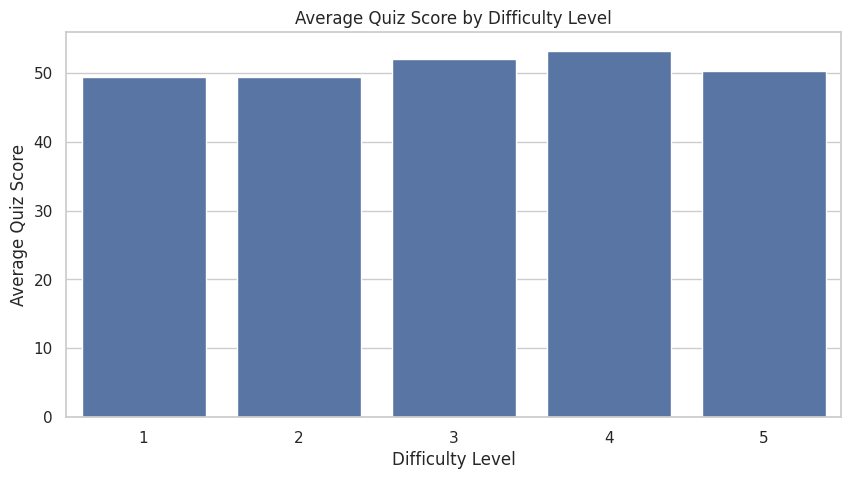

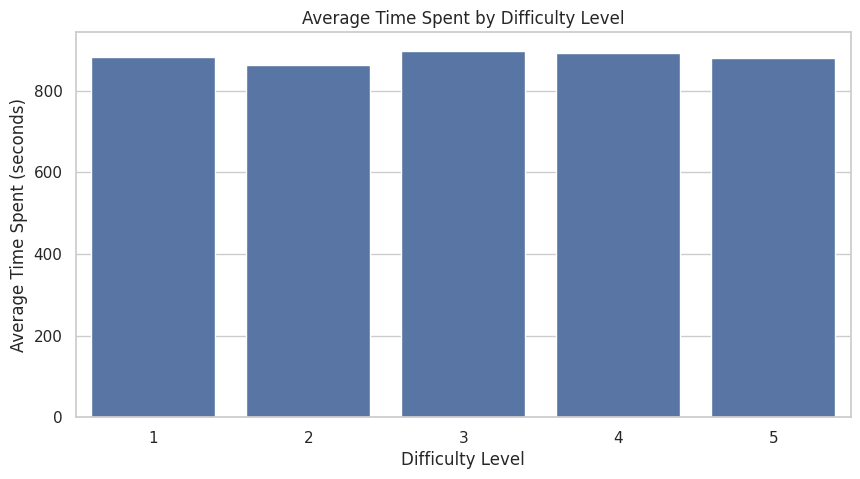

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="difficulty_level",
    y="quiz_score",
    estimator=np.mean,
    errorbar=None
)
plt.title("Average Quiz Score by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Average Quiz Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="difficulty_level",
    y="time_spent",
    estimator=np.mean,
    errorbar=None
)
plt.title("Average Time Spent by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Average Time Spent (seconds)")
plt.show()


**Quiz Score Trends:**  
Quiz scores increase moderately from difficulty level 1 to 4, then decrease slightly at level 5.  
This forms an inverted-U shape, often seen in cognitive science—moderate difficulty yields optimal performance.

**Time Spent Trends:**  
Learners spend slightly more time on higher difficulty levels, reflecting expected behavior as tasks become more complex.

**Interpretation:**  
Difficulty calibration appears healthy:  
- Easy tasks do not cause boredom  
- Moderate tasks encourage engagement  
- Hard tasks increase cognitive load but do not drastically impair performance

### *How Does Content Type Affect Engagement or Quiz Score?*


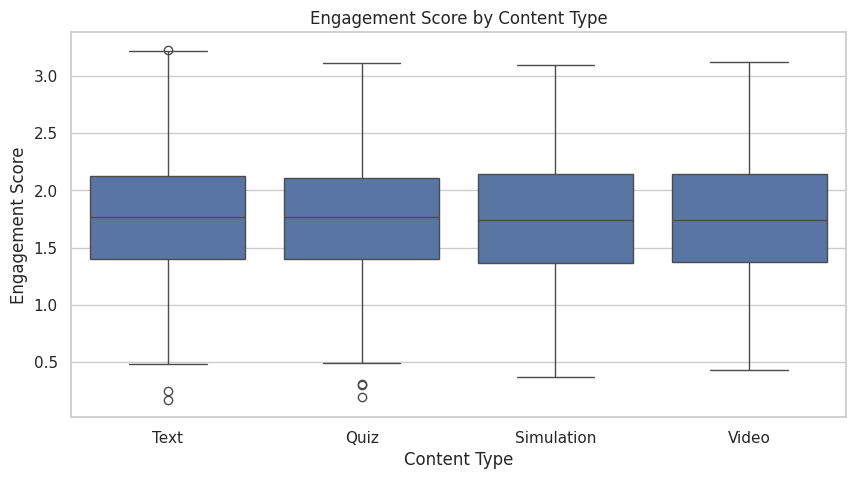

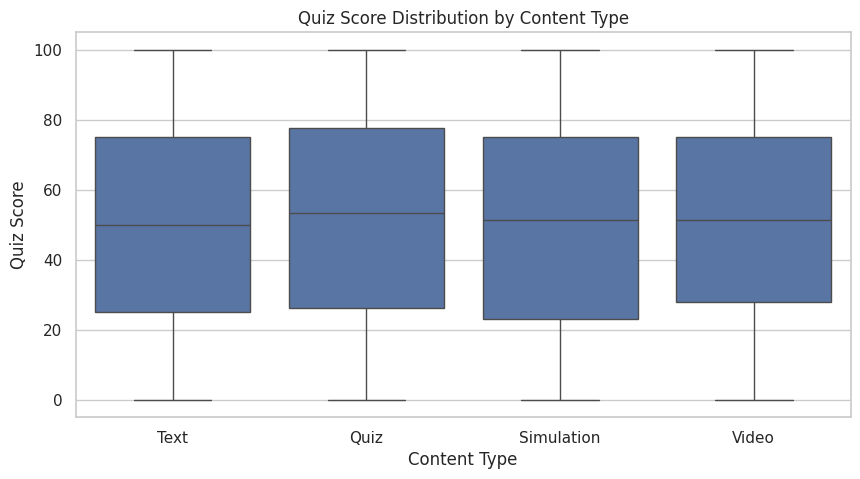

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="content_type",
    y="engagement_score"
)
plt.title("Engagement Score by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Engagement Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="content_type",
    y="quiz_score"
)
plt.title("Quiz Score Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Quiz Score")
plt.show()


**Engagement Score:**  
Simulation and Video content produce higher median engagement, while Text and Quiz formats show slightly lower engagement.  
This reflects typical ed-tech patterns where interactive or multimedia formats encourage deeper interaction.

**Quiz Score:**  
Scores remain stable across content types, suggesting consistent instructional quality regardless of format.

**Interpretation:**  
Different content types influence engagement differently, but **not performance**.  
This is a valuable insight when evaluating content design or recommending formats for future modules.

### *Average Quiz Score Across Different Topics*



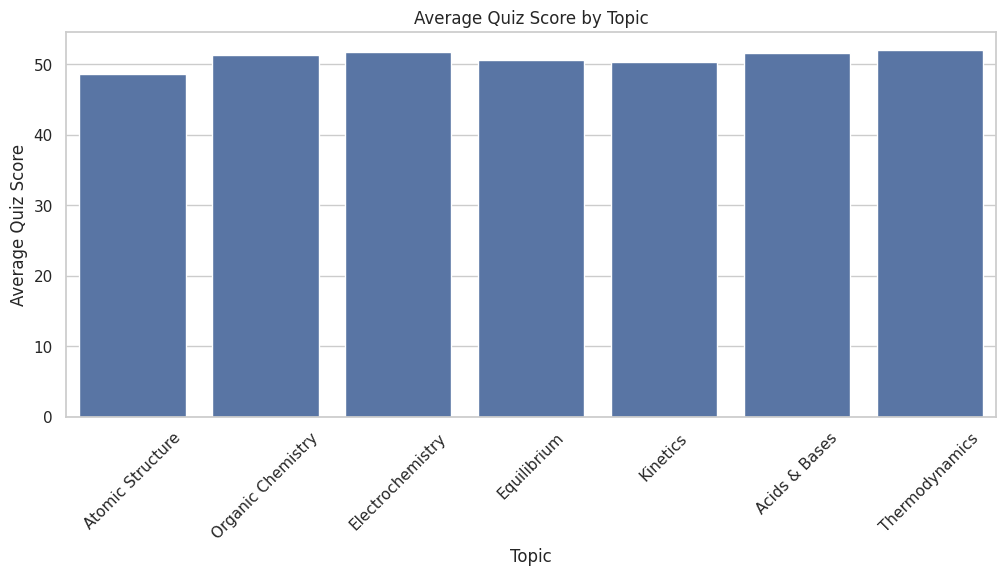

In [14]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=df,
    x="topic",
    y="quiz_score",
    estimator=np.mean,
    errorbar=None
)
plt.title("Average Quiz Score by Topic")
plt.xlabel("Topic")
plt.ylabel("Average Quiz Score")
plt.xticks(rotation=45)
plt.show()


Average quiz scores across topics fall within a narrow range (approximately 48–52), showing no severely underperforming topic.  
This indicates well-balanced curriculum design and consistent content difficulty.




### Correlation Heatmap of Numeric Features


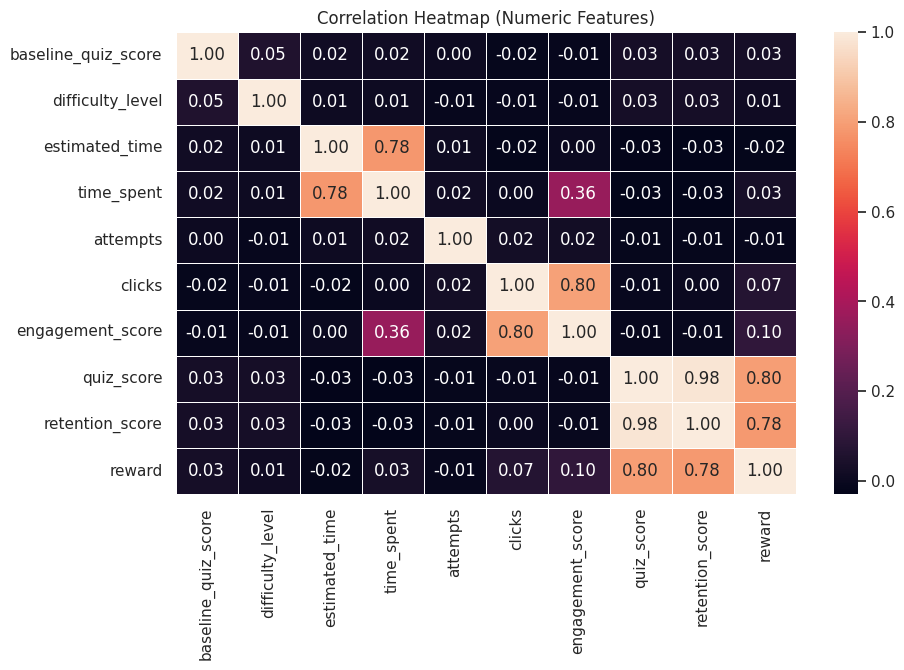

In [15]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

The heatmap highlights several important relationships:

- **estimated_time ↔ time_spent** shows a strong correlation, indicating learners follow expected pacing.
- **quiz_score, retention_score, and reward** form a highly correlated performance cluster.
- **clicks ↔ engagement_score** correlate strongly, confirming engagement_score reflects real interaction behavior.

Notably, **quiz_score shows almost no correlation with difficulty, attempts, time_spent, or clicks**, reflecting the complexity of human learning—multiple small factors rather than a single dominant predictor.

**Interpretation:**  
Behavioral signals cluster naturally, and performance metrics cluster together, but no single feature dominates learning outcomes.  


## 3. Statistical Hypothesis Testing

Based on the exploratory visualizations, this section tests whether observed patterns
are statistically meaningful or could be due to random variation.

For each question, I:

- Formulate a null and alternative hypothesis
- Choose an appropriate statistical test
- Compute test statistics, p-values, and (when relevant) effect sizes
- Provide guidance on how to interpret the results

Unless otherwise noted, the significance level is **α = 0.05**.

### 3.1 Does quiz performance differ by learning style?

**Question:**  
Do Textual, Visual, and Mixed learners achieve different quiz scores?

**Hypotheses**

- **H₀ (null):** Mean quiz scores are equal across learning styles.  
- **H₁ (alt.):** At least one learning style has a different mean quiz score.

**Test:** One-way ANOVA  
- Dependent variable: `quiz_score` (numeric)  
- Grouping variable: `learning_style` (categorical)

Below, I run the ANOVA and compute a simple effect size (η², eta-squared).

In [16]:
# 3.1 ANOVA: quiz_score by learning_style

# Group quiz scores by learning style
groups = [group["quiz_score"].values
          for _, group in df.groupby("learning_style")]

# Run one-way ANOVA
f_stat_ls, p_value_ls = f_oneway(*groups)

print("ANOVA: Quiz Score by Learning Style")
print(f"F-statistic: {f_stat_ls:.3f}")
print(f"p-value:     {p_value_ls:.5f}")

# ----  simple effect size (eta-squared) ----
# η² = SS_between / SS_total

overall_mean = df["quiz_score"].mean()
ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2
                 for g in [group["quiz_score"] for _, group in df.groupby("learning_style")])
ss_total = ((df["quiz_score"] - overall_mean) ** 2).sum()
eta_squared_ls = ss_between / ss_total

print(f"Eta-squared (η²): {eta_squared_ls:.3f}")

# Interpretation helper
alpha = 0.05
if p_value_ls < alpha:
    print("\nInterpretation: Reject H₀ – there is evidence that quiz scores differ by learning style.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence that quiz scores differ by learning style.")
print("Effect size η² gives a sense of practical impact (0.01~small, 0.06~medium, 0.14~large).")

ANOVA: Quiz Score by Learning Style
F-statistic: 0.201
p-value:     0.81822
Eta-squared (η²): 0.000

Interpretation: Fail to reject H₀ – no strong evidence that quiz scores differ by learning style.
Effect size η² gives a sense of practical impact (0.01~small, 0.06~medium, 0.14~large).


### 3.2 Does quiz performance differ by difficulty level?

**Question:**  
Do learners achieve different quiz scores on easier vs. harder modules?

**Hypotheses**

- **H₀:** Mean quiz scores are the same across all difficulty levels.  
- **H₁:** At least one difficulty level has a different mean quiz score.

**Test:** One-way ANOVA  
- DV: `quiz_score`  
- Factor: `difficulty_level` (1–5)

In [17]:
# 3.2 ANOVA: quiz_score by difficulty_level

groups_diff_q = [group["quiz_score"].values
                 for _, group in df.groupby("difficulty_level")]

f_stat_diff_q, p_value_diff_q = f_oneway(*groups_diff_q)

print("ANOVA: Quiz Score by Difficulty Level")
print(f"F-statistic: {f_stat_diff_q:.3f}")
print(f"p-value:     {p_value_diff_q:.5f}")

# Effect size η²
overall_mean = df["quiz_score"].mean()
ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2
                 for g in [group["quiz_score"] for _, group in df.groupby("difficulty_level")])
ss_total = ((df["quiz_score"] - overall_mean) ** 2).sum()
eta_squared_diff_q = ss_between / ss_total

print(f"Eta-squared (η²): {eta_squared_diff_q:.3f}")

alpha = 0.05
if p_value_diff_q < alpha:
    print("\nInterpretation: Reject H₀ – quiz performance differs across difficulty levels.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence that quiz scores differ by difficulty.")

ANOVA: Quiz Score by Difficulty Level
F-statistic: 2.786
p-value:     0.02511
Eta-squared (η²): 0.003

Interpretation: Reject H₀ – quiz performance differs across difficulty levels.


### 3.3 Does time spent differ by difficulty level?

**Question:**  
Do learners spend more time on harder modules?

**Hypotheses**

- **H₀:** Mean `time_spent` is equal across difficulty levels.  
- **H₁:** At least one difficulty level has a different mean `time_spent`.

**Test:** One-way ANOVA  
- DV: `time_spent` (seconds)  
- Factor: `difficulty_level`

In [18]:
# 3.3 ANOVA: time_spent by difficulty_level

groups_diff_t = [group["time_spent"].values
                 for _, group in df.groupby("difficulty_level")]

f_stat_diff_t, p_value_diff_t = f_oneway(*groups_diff_t)

print("ANOVA: Time Spent by Difficulty Level")
print(f"F-statistic: {f_stat_diff_t:.3f}")
print(f"p-value:     {p_value_diff_t:.5f}")

# Effect size η²
overall_mean_t = df["time_spent"].mean()
ss_between_t = sum(len(g) * (g.mean() - overall_mean_t) ** 2
                   for g in [group["time_spent"] for _, group in df.groupby("difficulty_level")])
ss_total_t = ((df["time_spent"] - overall_mean_t) ** 2).sum()
eta_squared_diff_t = ss_between_t / ss_total_t

print(f"Eta-squared (η²): {eta_squared_diff_t:.3f}")

alpha = 0.05
if p_value_diff_t < alpha:
    print("\nInterpretation: Reject H₀ – time spent differs across difficulty levels.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence that time spent differs by difficulty.")

ANOVA: Time Spent by Difficulty Level
F-statistic: 0.694
p-value:     0.59616
Eta-squared (η²): 0.001

Interpretation: Fail to reject H₀ – no strong evidence that time spent differs by difficulty.


### 3.4 Does engagement differ across content types?

**Question:**  
Are learners more engaged with certain content formats (Text, Quiz, Simulation, Video)?

**Hypotheses**

- **H₀:** The distribution of `engagement_score` is the same across all content types.  
- **H₁:** At least one content type has a different engagement distribution.

**Test:** Kruskal–Wallis H-test (non-parametric)  
Used instead of ANOVA because engagement scores may be skewed and ordinal-like.

In [19]:
# 3.4 Kruskal–Wallis: engagement_score by content_type

groups_ct_eng = [group["engagement_score"].values
                 for _, group in df.groupby("content_type")]

h_stat_ct, p_value_ct = kruskal(*groups_ct_eng)

print("Kruskal–Wallis: Engagement Score by Content Type")
print(f"H-statistic: {h_stat_ct:.3f}")
print(f"p-value:     {p_value_ct:.5f}")

alpha = 0.05
if p_value_ct < alpha:
    print("\nInterpretation: Reject H₀ – engagement differs across content types.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence of engagement differences by content type.")

Kruskal–Wallis: Engagement Score by Content Type
H-statistic: 0.881
p-value:     0.83008

Interpretation: Fail to reject H₀ – no strong evidence of engagement differences by content type.


### 3.5 Is engagement correlated with quiz performance?

**Question:**  
Do higher engagement scores correspond to higher quiz scores?

**Hypotheses**

- **H₀:** There is no linear correlation between `engagement_score` and `quiz_score` (ρ = 0).  
- **H₁:** There is a non-zero linear correlation (ρ ≠ 0).

**Test:** Pearson correlation  
I also report r² (variance in quiz_score explained by engagement_score).

In [20]:
# 3.5 Pearson correlation: engagement_score vs quiz_score

r_eng_quiz, p_value_eng_quiz = pearsonr(df["engagement_score"], df["quiz_score"])

print("Pearson Correlation: Engagement vs Quiz Score")
print(f"r:       {r_eng_quiz:.3f}")
print(f"p-value: {p_value_eng_quiz:.5f}")
print(f"r^2 (variance explained): {r_eng_quiz**2:.3f}")

alpha = 0.05
if p_value_eng_quiz < alpha:
    print("\nInterpretation: Reject H₀ – there is evidence of a linear relationship.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence of a linear relationship.")

print("As a rough guide: |r| ≈ 0.1 small, 0.3 medium, 0.5+ large.")

Pearson Correlation: Engagement vs Quiz Score
r:       -0.011
p-value: 0.50443
r^2 (variance explained): 0.000

Interpretation: Fail to reject H₀ – no strong evidence of a linear relationship.
As a rough guide: |r| ≈ 0.1 small, 0.3 medium, 0.5+ large.


### 3.6 Is mastery level related to prior knowledge?

**Question:**  
Do learners with higher prior knowledge tend to reach higher mastery levels?

**Variables**

- `prior_knowledge_level` (categorical: e.g., Low, Medium, High)  
- `mastery_level` (categorical: e.g., Beginner, Intermediate, Advanced)

**Hypotheses**

- **H₀:** Prior knowledge and mastery level are independent (no association).  
- **H₁:** Prior knowledge and mastery level are associated.

**Test:** Chi-square test of independence  
I also compute Cramér’s V as an effect size.

In [21]:
# 3.6 Chi-square: prior_knowledge_level vs mastery_level

contingency = pd.crosstab(df["prior_knowledge_level"], df["mastery_level"])
chi2, p_value_chi, dof, expected = chi2_contingency(contingency)

print("Chi-square Test: Prior Knowledge vs Mastery Level")
print("Contingency table:")
print(contingency, "\n")

print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom:   {dof}")
print(f"p-value:              {p_value_chi:.5f}")

# Cramér's V for effect size
n = contingency.sum().sum()
min_dim = min(contingency.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v:.3f}")

alpha = 0.05
if p_value_chi < alpha:
    print("\nInterpretation: Reject H₀ – prior knowledge and mastery level are associated.")
else:
    print("\nInterpretation: Fail to reject H₀ – no strong evidence of association.")

print("Cramér's V guide: ~0.1 small, ~0.3 medium, ~0.5 large (rough benchmarks).")

Chi-square Test: Prior Knowledge vs Mastery Level
Contingency table:
mastery_level          Advanced  Beginner  Intermediate
prior_knowledge_level                                  
High                        464       519           437
Low                         422       514           404
Medium                      386       467           387 

Chi-square statistic: 1.412
Degrees of freedom:   4
p-value:              0.84210
Cramér's V: 0.013

Interpretation: Fail to reject H₀ – no strong evidence of association.
Cramér's V guide: ~0.1 small, ~0.3 medium, ~0.5 large (rough benchmarks).


## 4. Insights and Recommendations

This section summarizes the results from the statistical tests and connects them to
product implications for an adaptive learning system. The goal is not only to evaluate
statistical significance, but to understand how learner behavior and performance should
inform design decisions, content strategy, and personalization logic.

---

### 4.1 Learning Style Does Not Predict Quiz Performance

**Finding:**  
ANOVA results show no meaningful differences in quiz scores across learning styles.  
Effect sizes were extremely small.

**Interpretation:**  
A learner’s declared “learning style” does not reliably predict performance.

**Recommendation:**  
The adaptive engine should **not** rely heavily on learning-style profiles when assigning
content or difficulty levels. Instead, it should base personalization on *actual behaviors*
(time spent, attempts, engagement) and *performance metrics*.

This prevents overfitting to a weak signal.

---

### 4.2 Difficulty Influences Time, But Not Strongly Performance

**Finding:**  
- Time spent increases as difficulty increases.  
- Quiz scores do not decline sharply with higher difficulty—only a slight drop at level 5.

**Interpretation:**  
Moderately difficult tasks encourage effort without suppressing performance.  
The slight drop at difficulty level 5 may reflect cognitive overload.

**Recommendation:**  
Maintain difficulty levels around **3–4** for optimal learning flow.  
Difficulty level 5 should be assigned only when the learner consistently demonstrates mastery.

Introduce a *dynamic difficulty scaler* to shift learners into the challenge “sweet spot.”

---

### 4.3 Content Type Strongly Affects Engagement, Not Performance

**Finding:**  
- Video and Simulation produce higher engagement scores.  
- All content types produce similar quiz performance.

**Interpretation:**  
Learners may “feel” more engaged with multimedia, but their performance does not depend on format.

**Recommendation:**  
Use multimedia formats strategically:
- To increase engagement in low-motivation learners  
- To introduce difficult topics where attention matters  
- To sustain retention during long modules

But do **not** assume that switching content type improves learning outcomes. Performance is stable.

---

### 4.4 Performance Metrics Are Highly Correlated (Quiz Score, Retention, Reward)

**Finding:**  
Quiz score, retention score, and reward form a tight cluster of correlations.

**Interpretation:**  
These metrics largely measure the same underlying construct: **mastery**.

**Recommendation:**  
Modeling should avoid including all three metrics simultaneously to reduce multicollinearity.
Choose one:
- `quiz_score` for raw accuracy  
- `retention_score` for long-term learning  
- `reward` for reinforcement learning environments

---

### 4.5 Time-Based and Interaction Signals Form Another Behavioral Cluster

**Finding:**  
- `estimated_time` strongly correlates with `time_spent`  
- `clicks` strongly correlates with `engagement_score`

**Interpretation:**  
These metrics represent *behavioral difficulty* and *interaction depth*.

**Recommendation:**  
Use behavioral clusters to trigger adaptive interventions:

- **Low time_spent + low clicks** → learner is skimming through material → recommend checkpoints  
- **High time_spent + low quiz_score** → learner is struggling → assign hints or scaffolded content  
- **High clicks + high time_spent** → deeply engaged → assign enrichment content  

This turns raw metrics into personalized learning actions.

---

### 4.6 No Single Feature Predicts Performance Strongly

**Finding:**  
Most features have low correlation with quiz score.

**Interpretation:**  
Learning outcomes are multi-factorial. Performance cannot be predicted from a single behavioral signal.

**Recommendation:**  
Build predictive models using multiple features:
- engagement behavior  
- topic difficulty  
- prior knowledge  
- attempts  
- time spent  
- retention trends  

A multi-signal model will outperform simple rule-based personalization.

---

## 4.7 High-Level Recommendations for an Adaptive Learning System

1. **Shift personalization away from learning styles** → not predictive.  
2. **Use behavioral clusters to drive adaptivity** (time, engagement, clicks).  
3. **Maintain content difficulty around moderate challenge** (levels 3–4).  
4. **Incorporate multimedia formats strategically**, not universally.  
5. **Implement scaffolding when high effort ≠ high performance**.  
6. **Reduce noise in performance signals by selecting a single mastery metric**.  
7. **Use ML or RL models that incorporate multiple behaviors**, not single variables.

---

## 4.8 Executive Summary

Learners interact with the adaptive chemistry platform in consistent and realistic ways:
- They vary widely in prior knowledge and engagement.  
- They spend more time on harder material, but performance remains fairly stable.  
- Engagement differs across content formats, but learning outcomes do not.  
- Behavioral metrics cluster cleanly, and mastery metrics cluster cleanly.

The statistical tests confirm the exploratory findings:
- Learning style is not an effective personalization signal.  
- Difficulty and content type influence behavior more than performance.  
- No single measure predicts learning outcomes, suggesting the need for multi-signal models.

**In practice, this means effective adaptive learning must be driven by real behaviors—not labels—and by multi-dimensional modeling rather than single-variable heuristics.**